# AI Job Market Visulization
- Explore salaries, skills, remote work, and trends in the global AI job market.
- **Dataset Time Period:** January 2024 - May 2025

In [69]:
# Step 0: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# For better plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# Load dataset
df = pd.read_csv('aijob.csv')
# Quick peek
print(df.head())
print(f"Dataset shape: {df.shape}")


    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4         

In [70]:
# Step 1: Basic info & cleaning
print(df.info())
print(df.isnull().sum())
# Drop columns if you want, or fill missing values for key cols
# For example, fill missing salary with median or drop rows with missing salary
df = df.dropna(subset=['salary_usd', 'experience_level', 'industry'])
# Convert posting_date to datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
# Clean remote_ratio to numeric if needed
df['remote_ratio'] = pd.to_numeric(df['remote_ratio'], errors='coerce')
# Quick check
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

# Salary Distribution by Experience Level

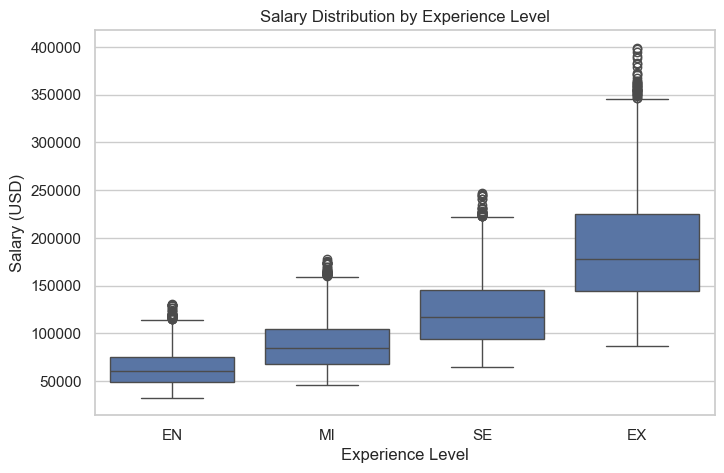

In [71]:
# Step 2: Salary vs Experience Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='experience_level', y='salary_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.title("Salary Distribution by Experience Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.show()


# Average Salary vs Years of Experience

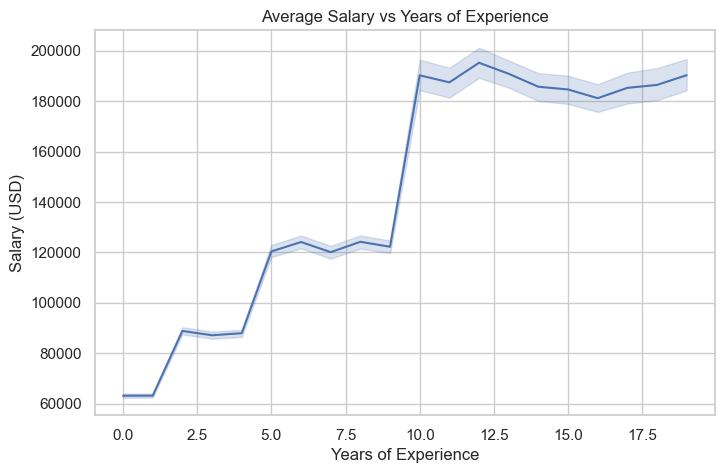

In [72]:
# Step 3: Scatter plot salary vs years_experience
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='years_experience', y='salary_usd', estimator='mean')
plt.title("Average Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()


# Top 10 Industries by Average Salary

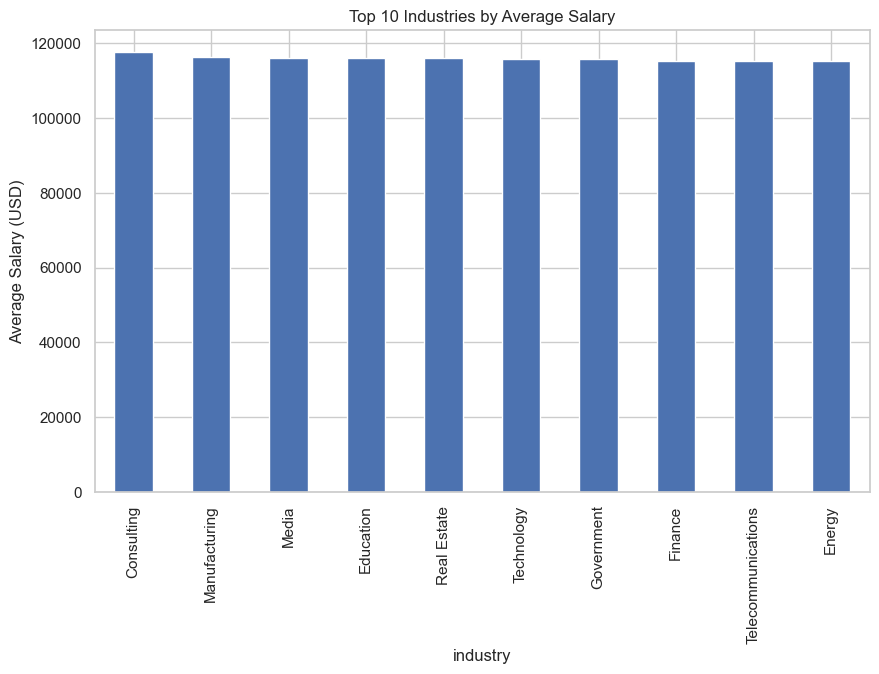

In [73]:
# Step 4: Top 10 industries by average salary
industry_salary = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(10)
industry_salary.plot(kind='bar')
plt.title("Top 10 Industries by Average Salary")
plt.ylabel("Average Salary (USD)")
plt.show()

# Remote Work Ratio by Industry and 🏢 Remote Work by Company Size

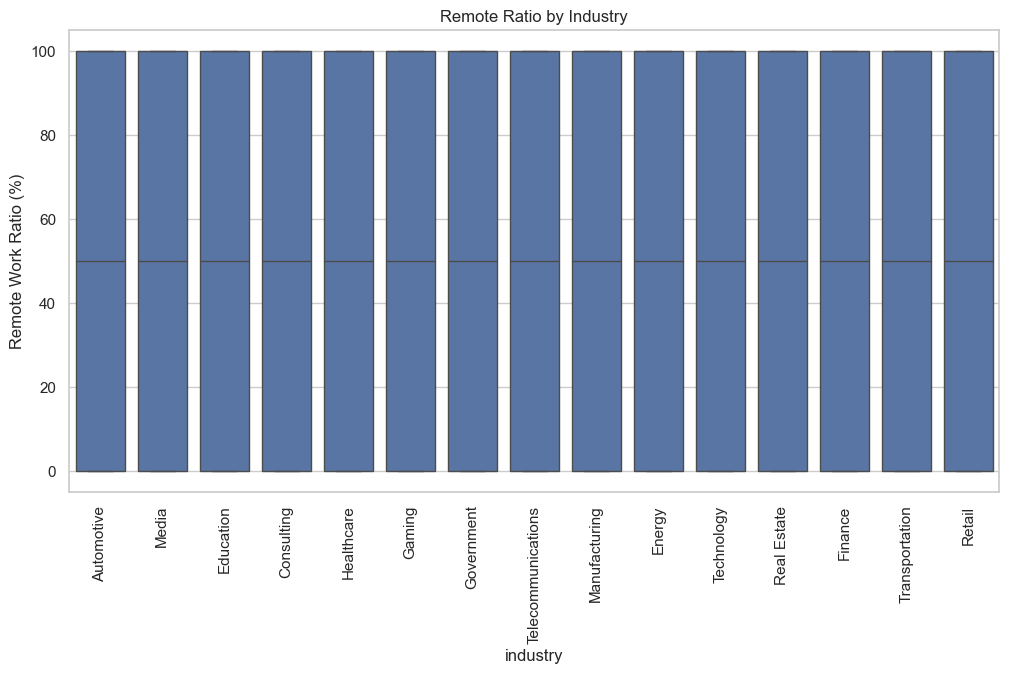

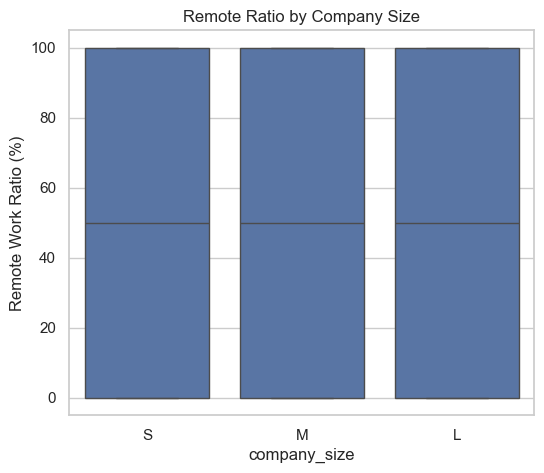

In [74]:
# Step 5: Remote ratio distribution by industry
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='industry', y='remote_ratio')
plt.xticks(rotation=90)
plt.title("Remote Ratio by Industry")
plt.ylabel("Remote Work Ratio (%)")
plt.show()

# Remote ratio by company size
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='company_size', y='remote_ratio', order=['S', 'M', 'L'])
plt.title("Remote Ratio by Company Size")
plt.ylabel("Remote Work Ratio (%)")
plt.show()


# On-site vs Remote Jobs

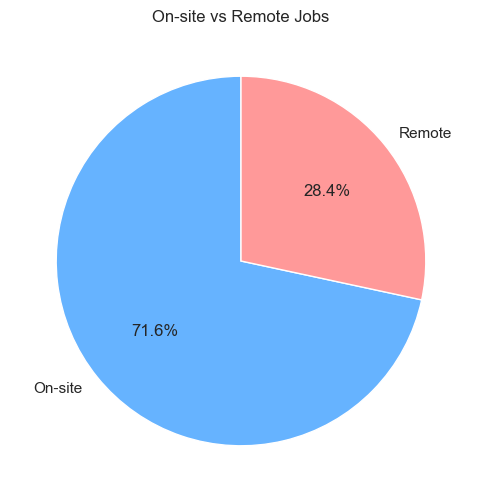

In [75]:
# Step 6: Count jobs where employee_residence == company_location (on-site) vs remote
df['is_remote'] = np.where(df['employee_residence'] == df['company_location'], 'On-site', 'Remote')
remote_counts = df['is_remote'].value_counts()
remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("On-site vs Remote Jobs")
plt.ylabel('')
plt.show()

# Top 20 Most In-Demand Skills

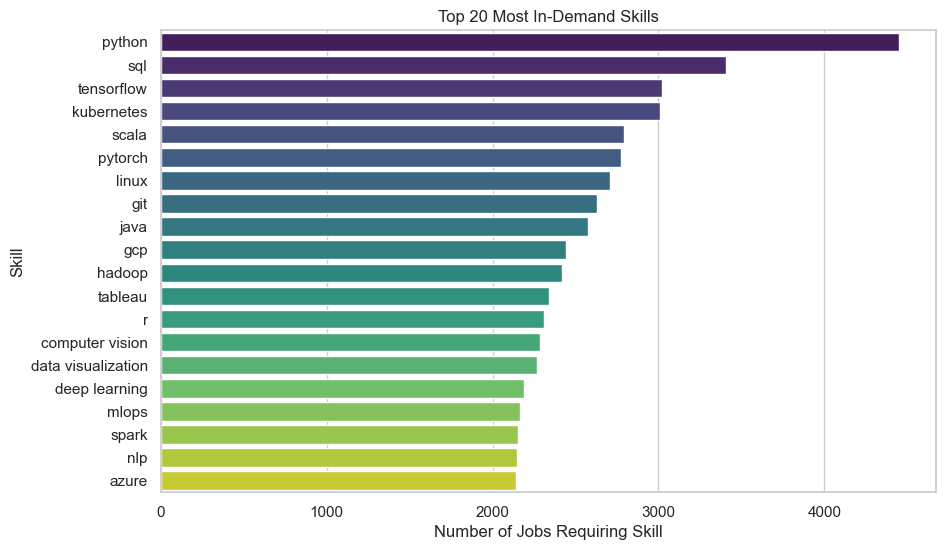

In [76]:
# Step 7: Extract and count required skills
# Assuming skills are comma separated strings
all_skills = df['required_skills'].dropna().str.split(',').explode().str.strip().str.lower()
skill_counts = Counter(all_skills)
# Top 20 skills
top_skills = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Count'])
sns.barplot(data=top_skills, x='Count', y='Skill', palette='viridis')
plt.title("Top 20 Most In-Demand Skills")
plt.xlabel("Number of Jobs Requiring Skill")
plt.show()


# Average Salary for Top 10 Skills

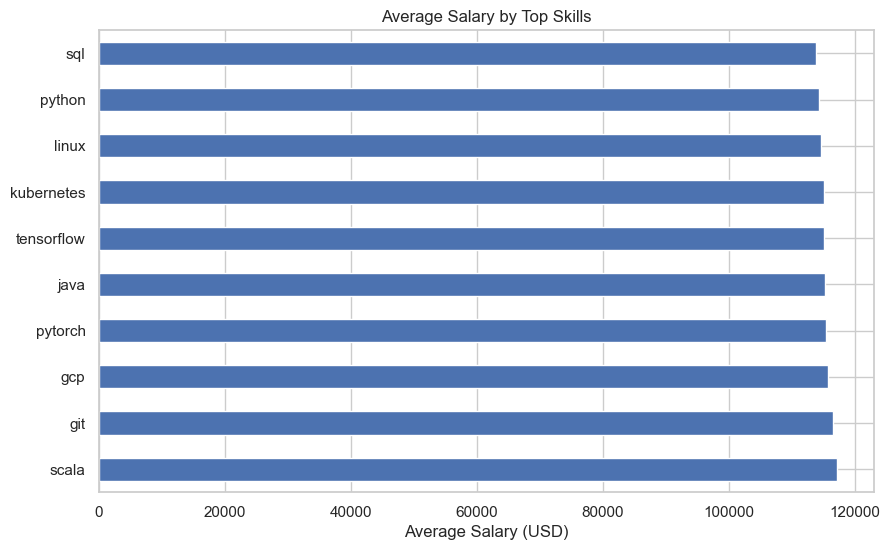

In [77]:
# Step 8: Average salary for top 10 skills

# Filter dataset to rows that contain each top skill and calculate average salary
avg_salary_skills = {}
for skill in top_skills['Skill'][:10]:
    mask = df['required_skills'].str.lower().str.contains(skill, na=False)
    avg_salary_skills[skill] = df.loc[mask, 'salary_usd'].mean()
avg_salary_df = pd.DataFrame.from_dict(avg_salary_skills, orient='index', columns=['Average_Salary'])
avg_salary_df = avg_salary_df.sort_values(by='Average_Salary', ascending=False)
avg_salary_df.plot(kind='barh', legend=False)
plt.title("Average Salary by Top Skills")
plt.xlabel("Average Salary (USD)")
plt.show()


# Jobs Posted Over Time

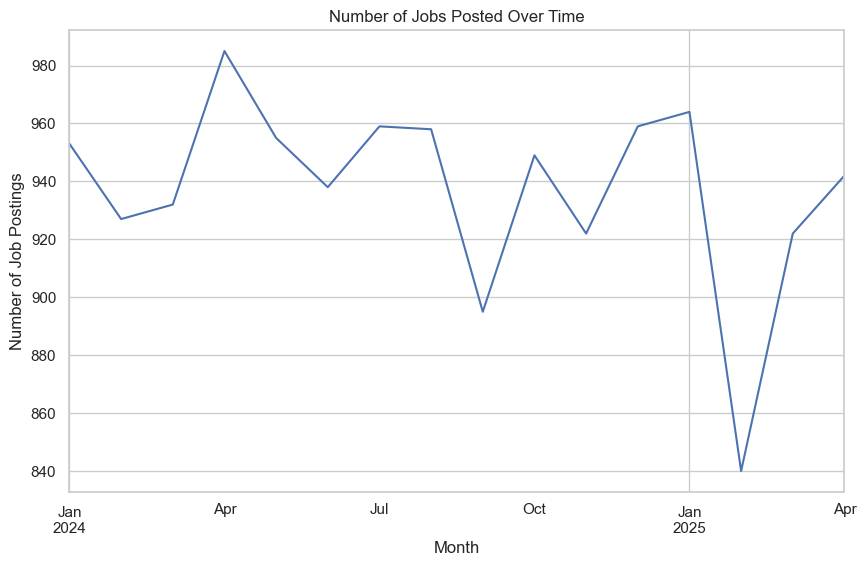

In [78]:
# Step 9: Number of jobs posted monthly
df['posting_month'] = df['posting_date'].dt.to_period('M')
jobs_per_month = df.groupby('posting_month').size()
jobs_per_month.plot()
plt.title("Number of Jobs Posted Over Time")
plt.ylabel("Number of Job Postings")
plt.xlabel("Month")
plt.show()

# Salary & Benefits by Company Size

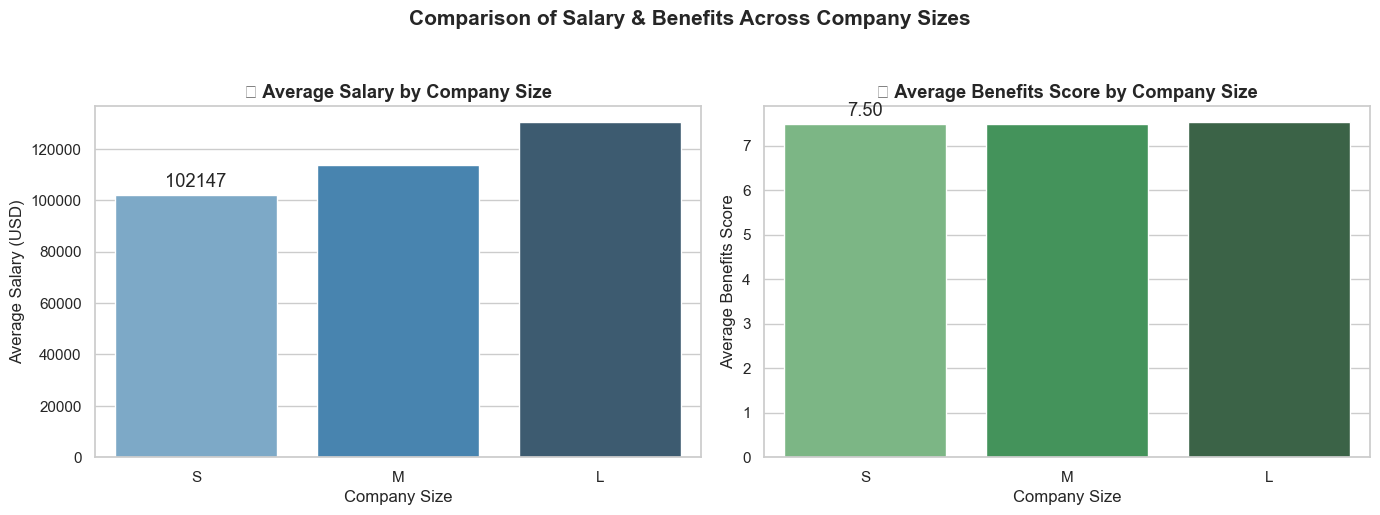

In [79]:
salary_by_size = df.groupby('company_size')['salary_usd'].mean().reindex(['S', 'M', 'L'])
benefits_by_size = df.groupby('company_size')['benefits_score'].mean().reindex(['S', 'M', 'L'])

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.set_theme(style="whitegrid", font_scale=1.1)

# Bar plot: Salary
sns.barplot(x=salary_by_size.index, y=salary_by_size.values, palette='Blues_d', ax=ax[0])
ax[0].set_title("💰 Average Salary by Company Size", fontweight='bold')
ax[0].set_xlabel("Company Size")
ax[0].set_ylabel("Average Salary (USD)")
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', padding=3)

# Bar plot: Benefits Score
sns.barplot(x=benefits_by_size.index, y=benefits_by_size.values, palette='Greens_d', ax=ax[1])
ax[1].set_title("🎁 Average Benefits Score by Company Size", fontweight='bold')
ax[1].set_xlabel("Company Size")
ax[1].set_ylabel("Average Benefits Score")
ax[1].bar_label(ax[1].containers[0], fmt='%.2f', padding=3)

plt.suptitle("Comparison of Salary & Benefits Across Company Sizes", fontsize=15, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()



# Top 15 Job Locations

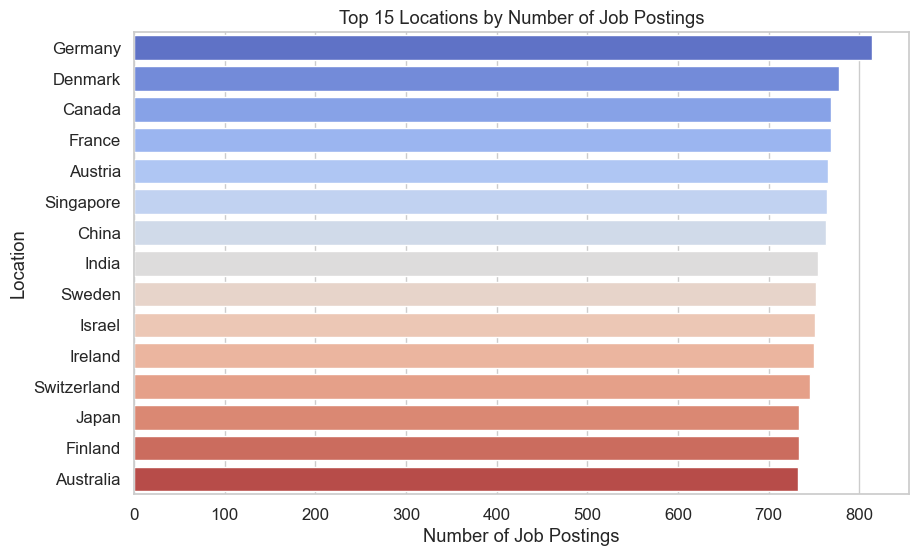

In [80]:
top_locations = df['company_location'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 15 Locations by Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()


# Top 15 Locations by Salary

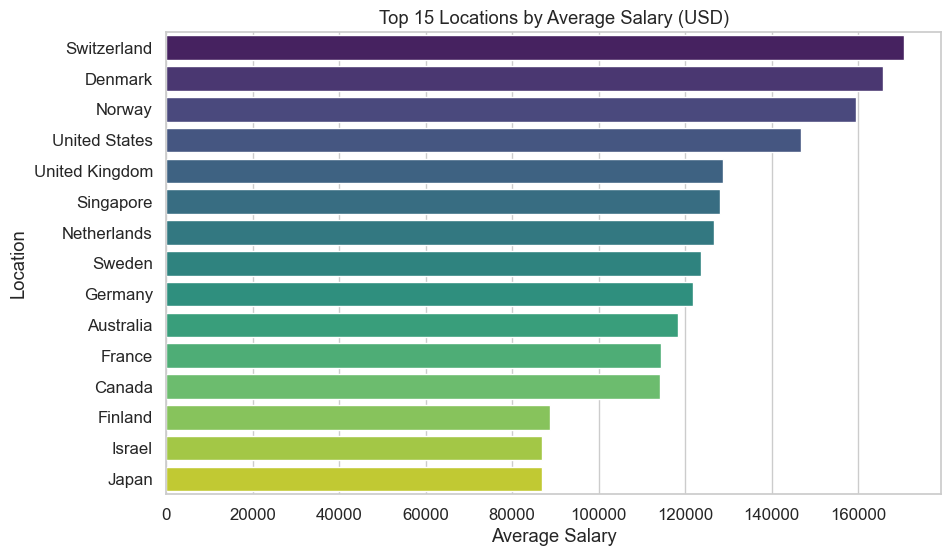

In [81]:
avg_salary_loc = df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_loc.values, y=avg_salary_loc.index, palette='viridis')
plt.title('Top 15 Locations by Average Salary (USD)')
plt.xlabel('Average Salary')
plt.ylabel('Location')
plt.show()


# Percentage of Remote Work Done by Employees in Various Countries

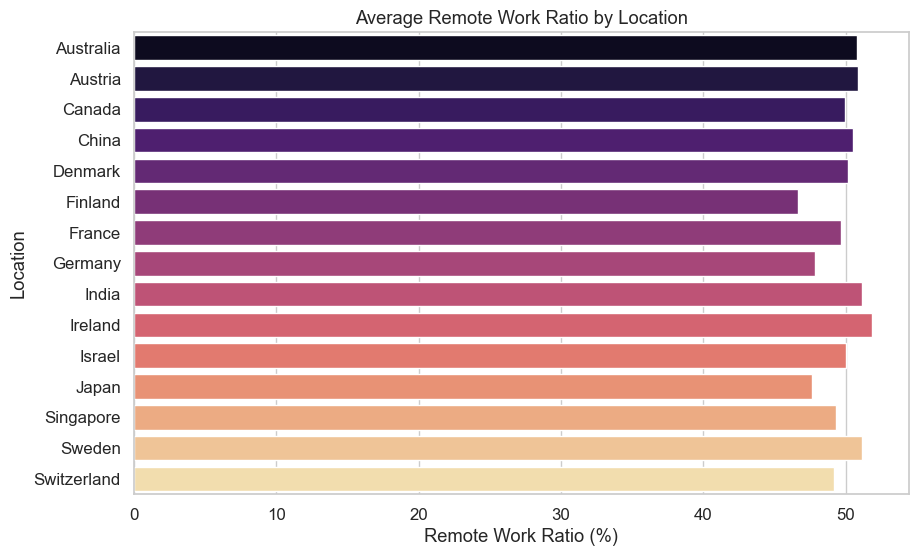

In [82]:
# Calculate average remote_ratio per location (only locations with enough data)
remote_loc = df.groupby('company_location')['remote_ratio'].mean()
remote_loc = remote_loc[remote_loc.index.isin(top_locations.index)]

plt.figure(figsize=(10,6))
sns.barplot(x=remote_loc.values, y=remote_loc.index, palette='magma')
plt.title('Average Remote Work Ratio by Location')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Location')
plt.show()


# Job Posting Trend Over Time (Top 5 Locations)

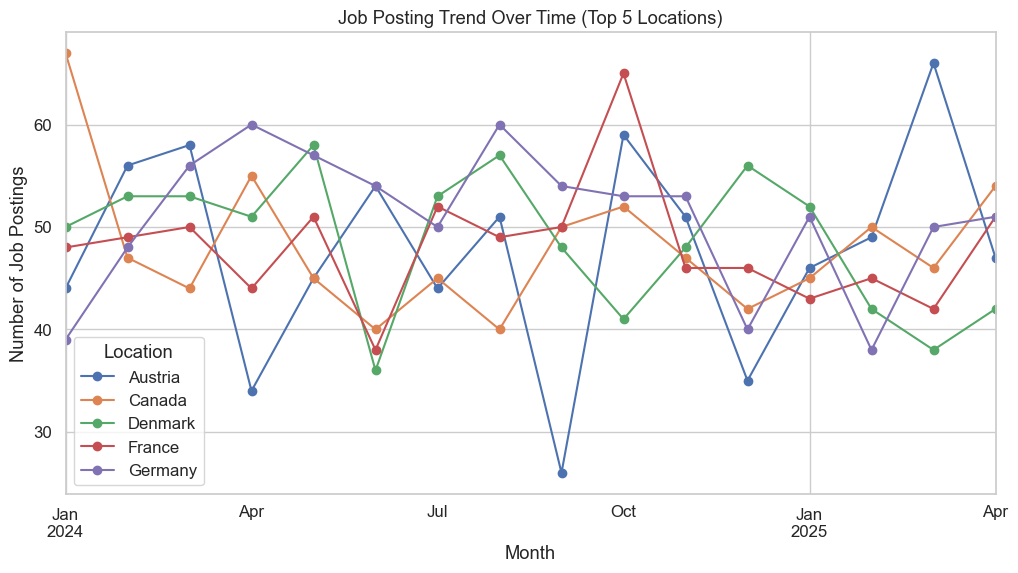

In [83]:
# Filter for top 5 locations for clarity
top5_locations = top_locations.index[:5]

df['posting_month'] = df['posting_date'].dt.to_period('M')

jobs_time_loc = df[df['company_location'].isin(top5_locations)].groupby(['posting_month', 'company_location']).size().unstack(fill_value=0)

jobs_time_loc.plot(figsize=(12,6), marker='o')
plt.title('Job Posting Trend Over Time (Top 5 Locations)')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend(title='Location')
plt.show()


# Salary Heatmap (Top 10 Locations × Top 8 Industries)

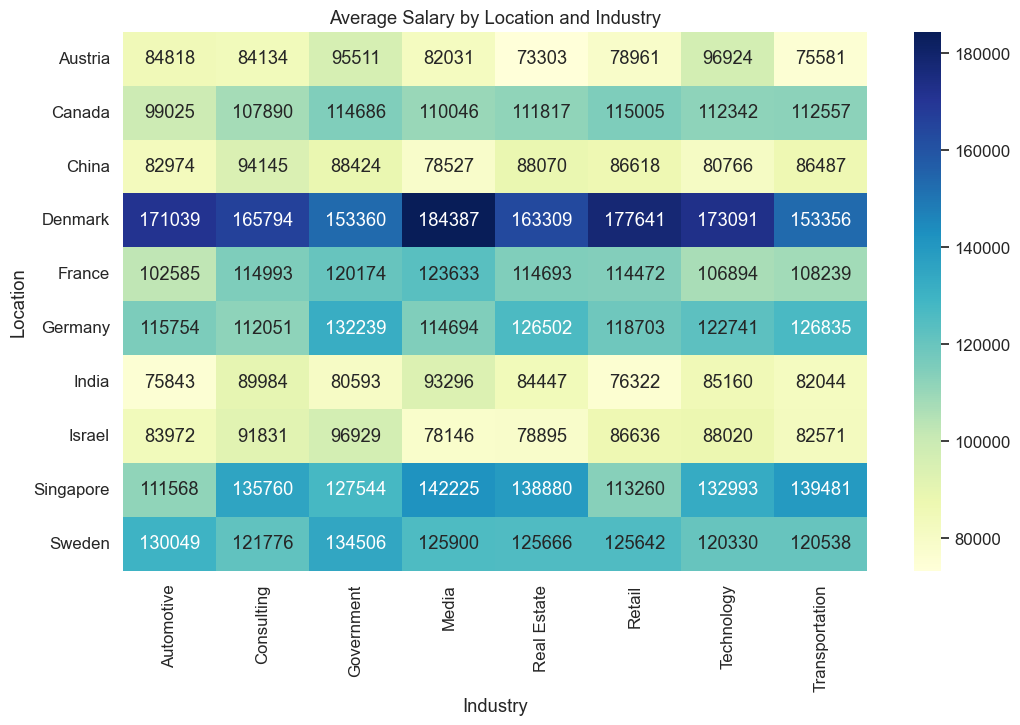

In [ ]:
# Top 10 locations and top 8 industries
top10_locations = df['company_location'].value_counts().head(10).index
top8_industries = df['industry'].value_counts().head(8).index

pivot_salary = df[(df['company_location'].isin(top10_locations)) & (df['industry'].isin(top8_industries))]\
    .pivot_table(values='salary_usd', index='company_location', columns='industry', aggfunc='mean')

plt.figure(figsize=(12,7))
sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Salary by Location and Industry')
plt.xlabel('Industry')
plt.ylabel('Location')
plt.show()